In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline


In [2]:
# Define the transformation: converting data to tensors
data_transform = transforms.ToTensor()


In [3]:
# Load the MNIST dataset with training and testing sets
train_data_set = datasets.MNIST(root='C:\\Users\\venka\\DeepLearning', train=True, download=True, transform=data_transform)
test_data_set = datasets.MNIST(root='C:\\Users\\venka\\DeepLearning', train=False, download=True, transform=data_transform)


In [4]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\venka\DeepLearning
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\venka\DeepLearning
    Split: Test
    StandardTransform
Transform: ToTensor()

In [18]:
# Define batch sizes
batch_sizes = [64, 1024]

# Create train and test DataLoaders for each batch size
train_loader1 = DataLoader(train_data_set, batch_size=batch_sizes[0], shuffle=True)
test_loader1 = DataLoader(test_data_set, batch_size=batch_sizes[0], shuffle=True)

train_loader2 = DataLoader(train_data_set, batch_size=batch_sizes[1], shuffle=True)
test_loader2 = DataLoader(test_data_set, batch_size=batch_sizes[1], shuffle=True)

In [15]:
# Calculate the number of parameters in the model
def calculate_params(model):
    num_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
    return num_params


In [54]:
class Model1(nn.Module):
    def __init__(self, in_features=784, hidden_units1=20, hidden_units2=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_units1)    
        self.fc2 = nn.Linear(hidden_units1, hidden_units2)
        self.output_layer = nn.Linear(hidden_units2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [55]:
# Instantiate the model and calculate the number of parameters
model1 = Model1()
model1_params = calculate_params(model1)

# Print the number of parameters
print(model1_params)


16950


In [56]:
# Define the loss function and optimizer for Model 1
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)


In [57]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
train_losses_mod1=[]
test_losses_mod1=[]
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # training  the batches
    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model1(X_train.view(-1,784))  
        trn_loss = criterion1(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer1.zero_grad()
        trn_loss.backward()
        optimizer1.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod1.append(trn_loss)
    train_correct_mod1.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            y_val = model1(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    test_loss = criterion1(y_val, y_test)
    test_losses_mod1.append(test_loss)
    test_correct_mod1.append(test_corr)

In [58]:
train_loss_list=[]

In [59]:
for i in range(len(train_losses_mod1)):
     train_loss_list.append(train_losses_mod1[i].detach().numpy())
  

In [60]:
test_loss_list=[]

In [62]:
for i in range(len(test_losses_mod1)):
     test_loss_list.append(test_losses_mod1[i].detach().numpy())

In [64]:
train_accuracy_list=[]
for i in range(len(train_correct_mod1)):
     train_accuracy_list.append(train_correct_mod1[i].detach().numpy()/600)

In [65]:
test_accuracy_list=[]
for i in range(len(test_correct_mod1)):
     test_accuracy_list.append(test_correct_mod1[i].detach().numpy()/100)

In [ ]:
#=================================================Model2 with batch size 1024====================================#

In [66]:
class Model2(nn.Module):
    def __init__(self, in_features=784, hidden_units1=20, hidden_units2=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_units1)    
        self.fc2 = nn.Linear(hidden_units1, hidden_units2)
        self.output_layer = nn.Linear(hidden_units2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [67]:
model2=Model2()
model2params=calculate_params(model2)
print(model2params)

16950


In [68]:
model2

Model2(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (output_layer): Linear(in_features=40, out_features=10, bias=True)
)

In [69]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)


In [70]:
epochs = 10
train_losses_mod2=[]
test_losses_mod2=[]
train_correct_mod2 = []
test_correct_mod2 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # training  the batches
    for b, (X_train, y_train) in enumerate(train_loader2):
       
        y_pred = model2(X_train.view(-1,784))  
        loss = criterion2(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod2.append(loss)
    train_correct_mod2.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            # Apply the model
            y_val = model2(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion2(y_val, y_test)
    test_losses_mod2.append(loss)
    test_correct_mod2.append(test_corr)

In [77]:
for i in range(len(train_losses_mod2)):
     train_loss_list.append(train_losses_mod2[i].detach().numpy())
  

In [78]:
for i in range(len(test_losses_mod2)):
     test_loss_list.append(test_losses_mod2[i].detach().numpy())

In [79]:
for i in range(len(train_correct_mod2)):
     train_accuracy_list.append(train_correct_mod2[i].detach().numpy()/600)

In [80]:
for i in range(len(test_correct_mod2)):
     test_accuracy_list.append(test_correct_mod2[i].detach().numpy()/100)

In [81]:
alpha = np.linspace(-1.0, 2.0, num=20)
theta_array = [(1 - alpha_val) * model1_params + alpha_val * model2params for alpha_val in alpha]


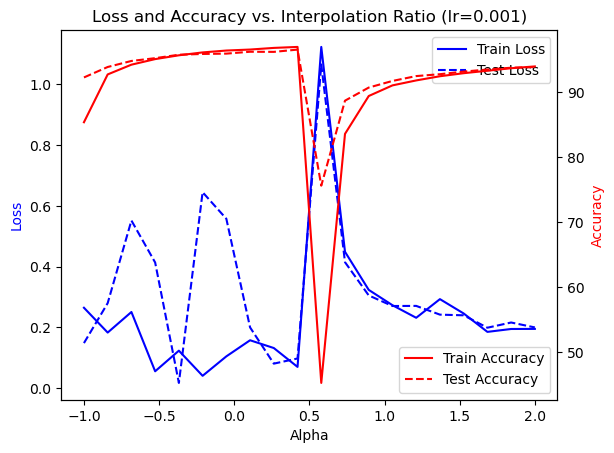

In [82]:
# Visualize Loss and Accuracy against the Interpolation Ratio with lr=0.001
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot training and testing losses
ax1.plot(alpha, train_loss_list, 'b', label='Train Loss')
ax1.plot(alpha, test_loss_list, 'b--', label='Test Loss')

# Plot training and testing accuracies
ax2.plot(alpha, train_accuracy_list, 'r', label='Train Accuracy')
ax2.plot(alpha, test_accuracy_list, 'r--', label='Test Accuracy')

# Set titles and labels
ax1.set_title('Loss and Accuracy vs. Interpolation Ratio (lr=0.001)')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')

# Show legends
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')


In [ ]:
#===============================Model with lr=0.01===================================#

In [83]:
class ModelOne(nn.Module):
    def __init__(self, in_features=784, hidden_layer1=20, hidden_layer2=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_layer1)    
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [85]:
model_one = ModelOne()
model_one
criterion_one = nn.CrossEntropyLoss()
optimizer_one = torch.optim.Adam(model_one.parameters(), lr=0.01)
model_one


ModelOne(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=10, bias=True)
)

In [86]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
train_losses_mod1=[]
test_losses_mod1=[]

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model_one(X_train.view(-1,784))  
        trn_loss = criterion_one(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer_one.zero_grad()
        trn_loss.backward()
        optimizer_one.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod1.append(trn_loss)
    train_correct_mod1.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            y_val = model_one(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    test_loss = criterion_one(y_val, y_test)
    test_losses_mod1.append(test_loss)
    test_correct_mod1.append(test_corr)
    

In [127]:
train_loss_list=[]

In [128]:
for i in range(len(train_losses_mod1)):
     train_loss_list.append(train_losses_mod1[i].detach().numpy())

In [129]:
test_loss_list=[]

In [130]:
for i in range(len(test_losses_mod1)):
     test_loss_list.append(test_losses_mod1[i].detach().numpy())

In [131]:
train_accuracy_list=[]

In [132]:
for i in range(len(train_correct_mod1)):
     train_accuracy_list.append(train_correct_mod1[i].detach().numpy()/600)

In [133]:
test_accuracy_list=[]

In [134]:
for i in range(len(test_correct_mod1)):
     test_accuracy_list.append(test_correct_mod1[i].detach().numpy()/100)

In [136]:
class ModelTwo(nn.Module):
    def __init__(self, in_features=784, hidden_layer1=20, hidden_layer2=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_layer1)    
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [137]:
model_two = ModelTwo()

In [138]:
criterion_two = nn.CrossEntropyLoss()
optimizer_two = torch.optim.Adam(model_two.parameters(), lr=0.01)


In [139]:
epochs = 10
train_correct_mod2 = []
test_correct_mod2 = []
train_losses_mod2=[]
test_losses_mod2=[]

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader2):
       
        y_pred = model_two(X_train.view(-1,784))  
        trn_loss = criterion_two(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer_two .zero_grad()
        trn_loss.backward()
        optimizer_two .step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod2.append(trn_loss)
    train_correct_mod2.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            y_val = model_two(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    test_loss = criterion_two(y_val, y_test)
    test_losses_mod2.append(test_loss)
    test_correct_mod2.append(test_corr)

In [140]:
for i in range(len(train_losses_mod2)):
     train_loss_list.append(train_losses_mod2[i].detach().numpy())

In [141]:
for i in range(len(test_losses_mod2)):
     test_loss_list.append(test_losses_mod2[i].detach().numpy())

In [142]:
for i in range(len(train_correct_mod2)):
     train_accuracy_list.append(train_correct_mod2[i].detach().numpy()/600)

In [143]:
for i in range(len(test_correct_mod2)):
     test_accuracy_list.append(test_correct_mod2[i].detach().numpy()/100)

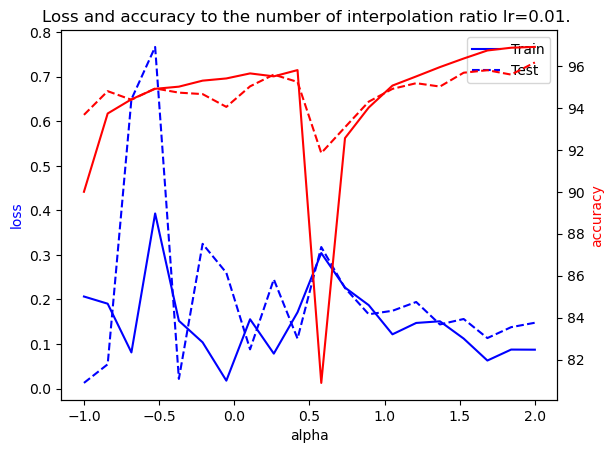

In [144]:
# Visulaize Loss and accuracy to the number of interpolation ratio with lr=0.001 for batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alpha, train_loss_list, 'b', label='Train')
ax1.plot(alpha, test_loss_list, 'b--', label='Test')
ax2.plot(alpha, train_accuracy_list, 'r', label='accuracy')
ax2.plot(alpha, test_accuracy_list, 'r--', label='accuracy')
ax1.set_title('Loss and accuracy to the number of interpolation ratio lr=0.01. ')
ax1.set_xlabel('alpha')
ax1.set_ylabel('loss', color='b')
ax2.set_ylabel('accuracy', color='r')
ax1.legend(loc='upper right')